In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

from lstm_model import*

import sys
sys.path.insert(0, '../')
from data_preparation import *

Using TensorFlow backend.


In [3]:
from numpy.random import seed
seed(1234)
from tensorflow import set_random_seed
set_random_seed(1234)

In [4]:
train_1 = pd.read_csv("../../web-traffic-time-series-forecasting/train_1.csv")
data = data_per_date(train_1)

In [5]:
N_of_pages = 6
page = {}
titles = list()


for i in range(N_of_pages):
    titles.append(data['Page'][np.random.randint(0,len(data))])

for i in range(N_of_pages):
    page[i] = find_page(data, titles[i])

In [6]:
import time
start = time.time()

all_models = {}
lookback = 1
size = int(0.80*len(page[0]))
i = 0

for i in range(N_of_pages):

    
    train, test = series_split(page[i], size)
    scaler, train_scaled, test_scaled = scale(train, test)
    

    print("Starting modelling page %d out of %d" %(i+1, N_of_pages))

    lstm_model = fit_lstm(train_scaled, units = 50, \
                         batch_size = 20, nb_epochs = 100, \
                         lookback = lookback)
    
    all_models[i] = lstm_model
    print("Model completed for page %d out of %d" %(i+1, N_of_pages))

end = time.time()
print("total elapsed time:", end - start)

Starting modelling page 1 out of 6
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Model completed for page 1 out of 6
Starting modelling page 2 out of 6
Model completed for page 2 out of 6
Starting modelling page 3 out of 6
Model completed for page 3 out of 6
Starting modelling page 4 out of 6
Model completed for page 4 out of 6
Starting modelling page 5 out of 6
Model completed for page 5 out of 6
Starting modelling page 6 out of 6
Model completed for page 6 out of 6
total elapsed time: 207.6134898662567


In [7]:
test_predictions = {}

for i in range(N_of_pages):
    train, test = series_split(page[i], size)
    scaler, train_scaled, test_scaled = scale(train, test)
    
    X_train, y_train = create_dataset(train_scaled, lookback)
    X_test, y_test = create_dataset(test_scaled, lookback)
    
    train_predictions = all_models[i].predict(X_train, batch_size = 20)
    test_predictions[i] = all_models[i].predict(X_test, batch_size = 20)
    
    test_predictions[i] = scaler.inverse_transform(test_predictions[i])
    X_test[0:,0] = scaler.inverse_transform(X_test[0:,0])
    print('------------------------')
    #print('Train Mean Absolute Error:', mean_absolute_error(X_train[0:,0], train_predictions))
    print('Test SMAPE:', smape(X_test[0:,0], test_predictions[i]))
    print('------------------------')

------------------------
Test SMAPE: 30.137937509445894
------------------------
------------------------
Test SMAPE: 36.48526083852366
------------------------
------------------------
Test SMAPE: 1.135795823899556
------------------------
------------------------
Test SMAPE: 24.59827798067518
------------------------
------------------------
Test SMAPE: 13.395896146485786
------------------------
------------------------
Test SMAPE: 18.5467900494904
------------------------


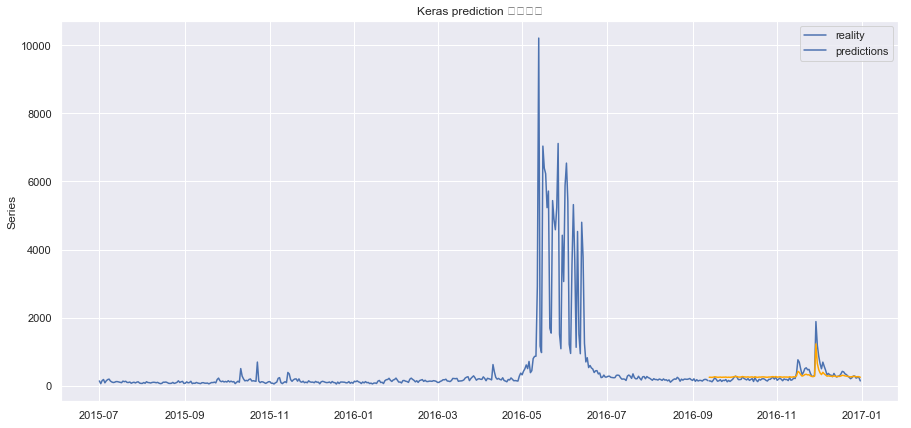

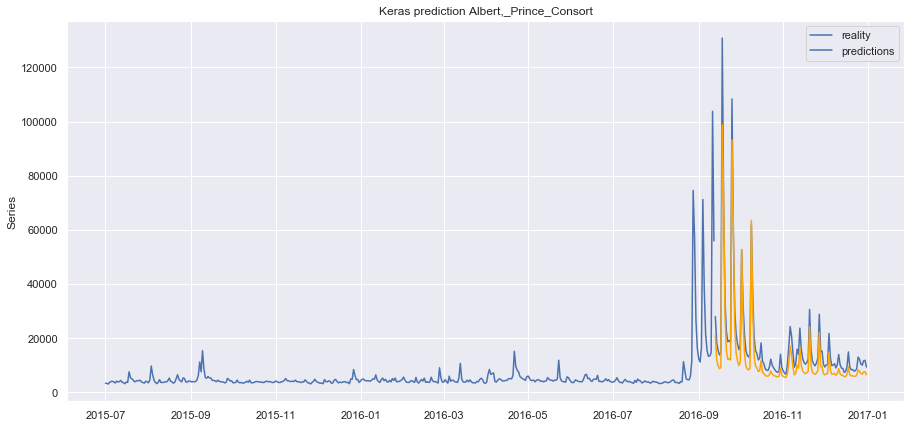

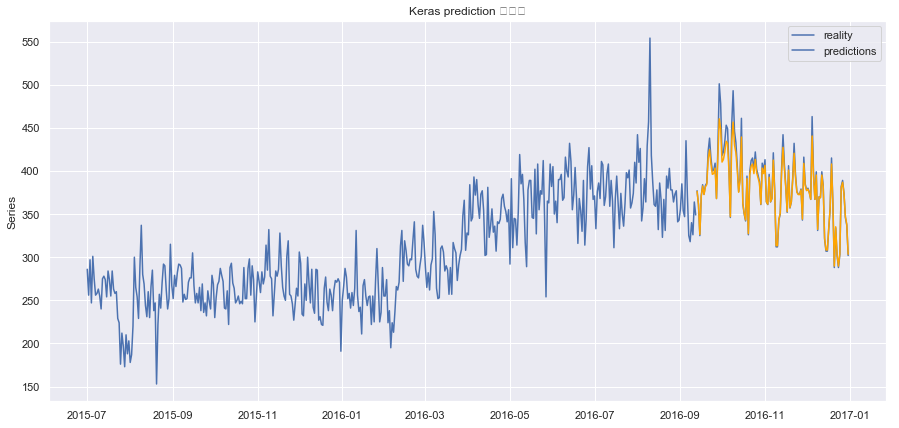

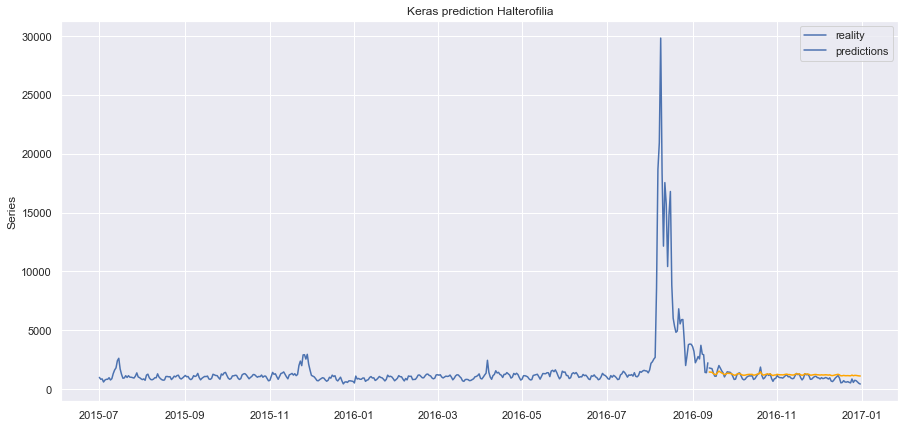

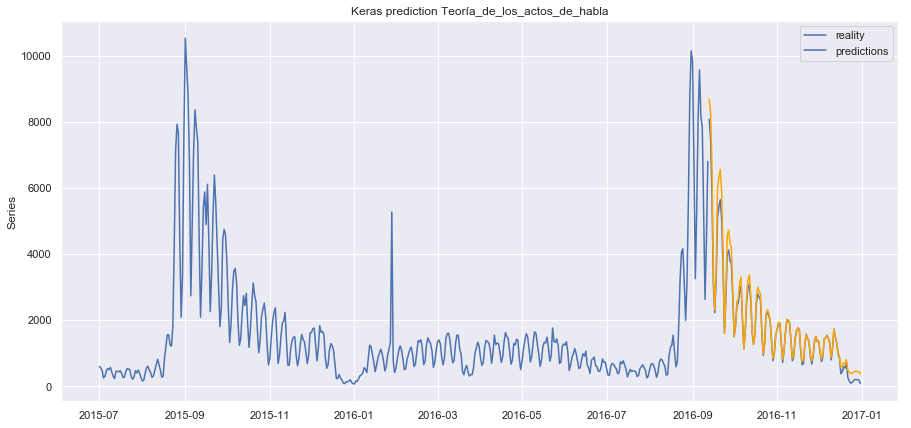

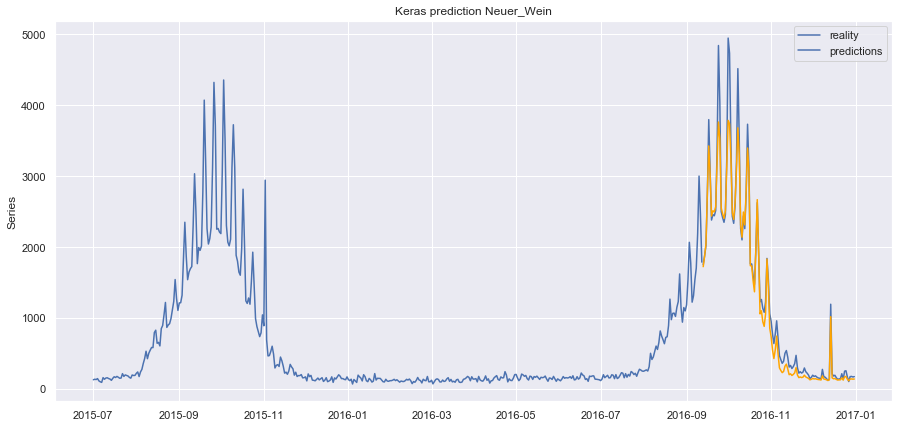

In [8]:
for i in range(N_of_pages):
        
    train, test = series_split(page[i], size)
    scaler, train_scaled, test_scaled = scale(train, test)
    
    X_train, y_train = create_dataset(train_scaled, lookback)
    X_test, y_test = create_dataset(test_scaled, lookback)
    X_test[0:,0] = scaler.inverse_transform(X_test[0:,0])
    
    
    plot_keras(train, test, X_test, test_predictions[i], lookback, titles[i])  
